In [1]:
import pandas as pd

In [9]:
df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name= None)

In [11]:
df.keys()

dict_keys(['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status'])

In [15]:
demog = df['Customer_Demographics']
trans_hist = df['Transaction_History']
cust_serv = df['Customer_Service']
online_act = df['Online_Activity']
churn_stat = df['Churn_Status']

In [14]:
demog.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [16]:
trans_hist.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [17]:
cust_serv.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [18]:
online_act.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [19]:
churn_stat.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [20]:
demog.info

<bound method DataFrame.info of      CustomerID  Age Gender MaritalStatus IncomeLevel
0             1   62      M        Single         Low
1             2   65      M       Married         Low
2             3   18      M        Single         Low
3             4   21      M       Widowed         Low
4             5   21      M      Divorced      Medium
..          ...  ...    ...           ...         ...
995         996   54      F        Single         Low
996         997   19      M       Widowed        High
997         998   47      M       Married         Low
998         999   23      M       Widowed        High
999        1000   34      M       Widowed         Low

[1000 rows x 5 columns]>

In [22]:
demog.dtypes

CustomerID        int64
Age               int64
Gender           object
MaritalStatus    object
IncomeLevel      object
dtype: object

In [24]:
churn_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [32]:
merged_df = demog.merge(trans_hist, on='CustomerID').merge(online_act, on='CustomerID').merge(cust_serv, on='CustomerID')

In [33]:
merged_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,LastLoginDate,LoginFrequency,ServiceUsage,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,2023-10-21,34,Mobile App,6363,2022-03-31,Inquiry,Resolved
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,2023-12-05,5,Website,3329,2022-03-17,Inquiry,Resolved
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,2023-12-05,5,Website,3329,2022-03-17,Inquiry,Resolved
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,2023-12-05,5,Website,3329,2022-03-17,Inquiry,Resolved
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,2023-12-05,5,Website,3329,2022-03-17,Inquiry,Resolved


In [36]:
merged_df.info

<bound method DataFrame.info of       CustomerID  Age Gender MaritalStatus IncomeLevel  TransactionID  \
0              1   62      M        Single         Low           7194   
1              2   65      M       Married         Low           7250   
2              2   65      M       Married         Low           9660   
3              2   65      M       Married         Low           2998   
4              2   65      M       Married         Low           1228   
...          ...  ...    ...           ...         ...            ...   
5199         995   23      F      Divorced         Low           1236   
5200         995   23      F      Divorced         Low           6933   
5201         995   23      F      Divorced         Low           4405   
5202         995   23      F      Divorced         Low           8667   
5203         995   23      F      Divorced         Low           7583   

     TransactionDate  AmountSpent ProductCategory LastLoginDate  \
0         2022-03-27    

In [37]:
demog.value_counts()

CustomerID  Age  Gender  MaritalStatus  IncomeLevel
1000        34   M       Widowed        Low            1
1           62   M       Single         Low            1
2           65   M       Married        Low            1
3           18   M       Single         Low            1
4           21   M       Widowed        Low            1
                                                      ..
13          24   F       Divorced       Low            1
12          41   F       Married        Low            1
11          54   M       Divorced       Medium         1
10          68   M       Married        High           1
9           39   M       Divorced       High           1
Name: count, Length: 1000, dtype: int64

In [38]:
online_act.value_counts()

CustomerID  LastLoginDate  LoginFrequency  ServiceUsage  
1000        2023-08-13     22              Mobile App        1
1           2023-10-21     34              Mobile App        1
2           2023-12-05     5               Website           1
3           2023-11-15     3               Website           1
4           2023-08-25     2               Website           1
                                                            ..
13          2023-07-05     10              Mobile App        1
12          2023-12-31     43              Website           1
11          2023-01-22     30              Online Banking    1
10          2023-01-13     29              Online Banking    1
9           2023-06-27     24              Website           1
Name: count, Length: 1000, dtype: int64

In [39]:
trans_hist.value_counts()

CustomerID  TransactionID  TransactionDate  AmountSpent  ProductCategory
1000        8594           2022-04-08       166.73       Books              1
1           7194           2022-03-27       416.50       Electronics        1
2           1228           2022-07-24       397.37       Clothing           1
            2998           2022-01-25       101.31       Furniture          1
            3527           2022-09-16       311.34       Electronics        1
                                                                           ..
4           7670           2022-05-22       382.39       Furniture          1
            4235           2022-12-22       241.45       Electronics        1
            3419           2022-12-27       44.22        Clothing           1
            3394           2022-07-31       125.64       Electronics        1
            1211           2022-12-01       123.59       Groceries          1
Name: count, Length: 5054, dtype: int64

In [40]:
cust_serv.value_counts()

CustomerID  InteractionID  InteractionDate  InteractionType  ResolutionStatus
995         9101           2022-05-02       Inquiry          Resolved            1
1           6363           2022-03-31       Inquiry          Resolved            1
2           3329           2022-03-17       Inquiry          Resolved            1
3           9976           2022-08-24       Inquiry          Resolved            1
4           5393           2022-07-03       Inquiry          Unresolved          1
                                                                                ..
14          4459           2022-07-25       Complaint        Unresolved          1
13          9681           2022-07-27       Complaint        Resolved            1
12          8485           2022-11-29       Feedback         Resolved            1
            7872           2022-01-12       Inquiry          Unresolved          1
11          7511           2022-01-26       Feedback         Unresolved          1
Name: cou

In [41]:
import seaborn as sns

C:\Users\Naomie  Fillies\AppData\Local\Temp\ipykernel_12144\977595724.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


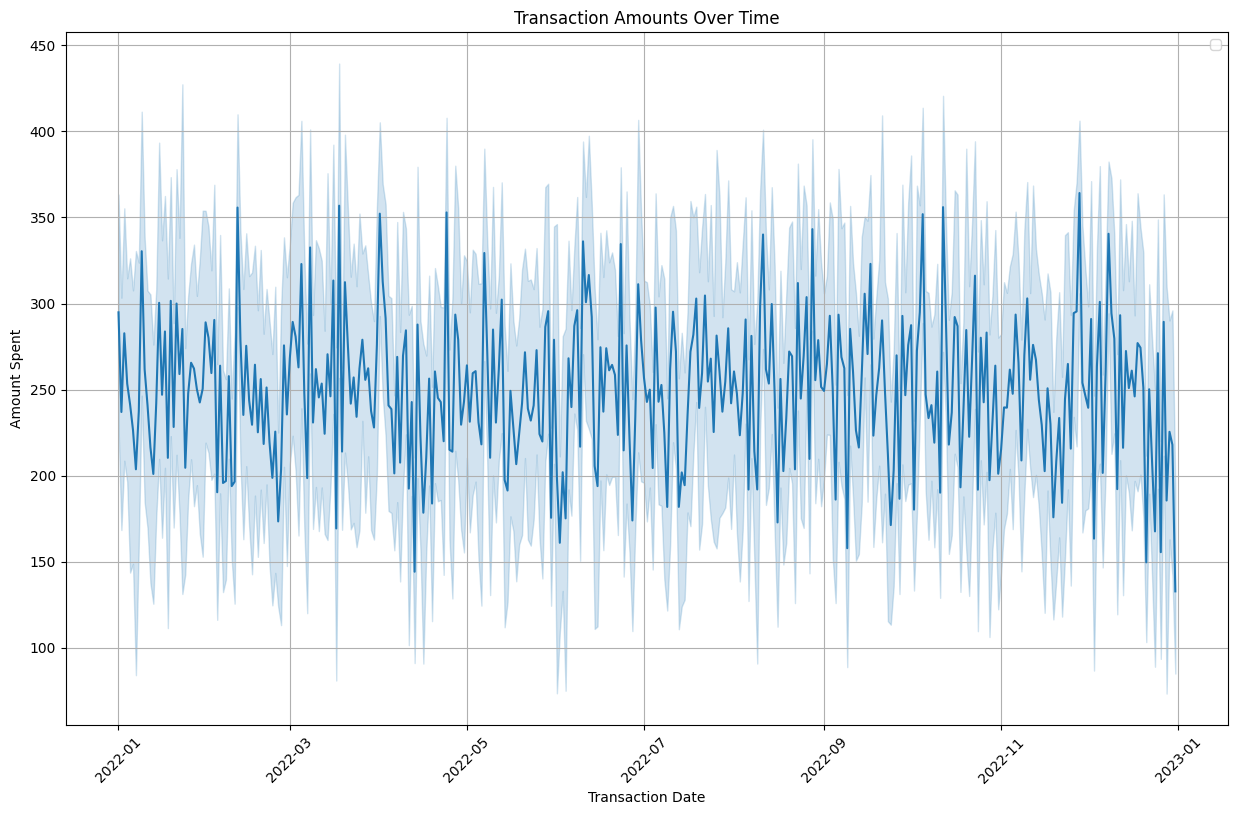

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure TransactionDate is in datetime format
trans_hist['TransactionDate'] = pd.to_datetime(trans_hist['TransactionDate'])

# Plotting the line graph
plt.figure(figsize=(15, 9))
sns.lineplot(data=trans_hist, x='TransactionDate', y='AmountSpent')

# Customize the plot
plt.title('Transaction Amounts Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Amount Spent')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
# Show the plot
plt.show()


C:\Users\Naomie  Fillies\AppData\Local\Temp\ipykernel_12144\2791194868.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_resolution_counts = cust_serv.groupby(['InteractionType', 'ResolutionStatus']).size().unstack(fill_value=0)


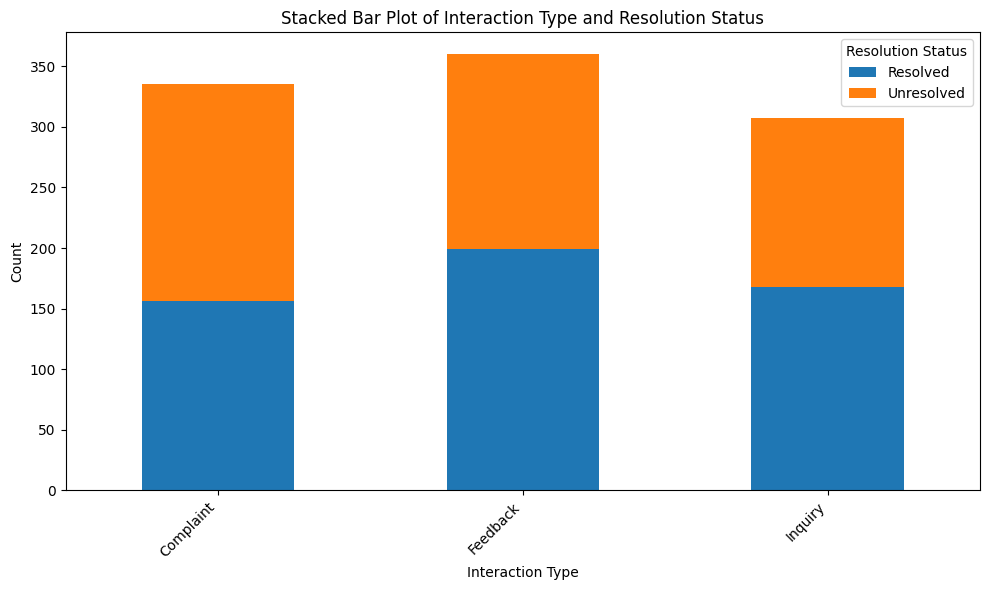

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cust_serv DataFrame is already loaded

# Group by 'InteractionType' and 'ResolutionStatus' and sum
interaction_resolution_counts = cust_serv.groupby(['InteractionType', 'ResolutionStatus']).size().unstack(fill_value=0)

# Create the stacked bar plot
interaction_resolution_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Interaction Type and Resolution Status')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Resolution Status')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [76]:
trans_hist['Month'] = trans_hist['TransactionDate'].dt.month
monthly_sales = trans_hist.groupby('Month')['AmountSpent'].sum()
# Separate the data into month and sales
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df.columns = ['Month', 'Sales']

monthly_sales_df

,Month,Sales
0,1,106751.13
1,2,93298.29
2,3,109112.41
3,4,101904.86
4,5,113049.43
5,6,104553.83
6,7,112240.73
7,8,109784.25
8,9,105097.87
9,10,103325.79


In [75]:
trans_hist['TransactionDate']

0      2022-03-27
1      2022-08-08
2      2022-07-25
3      2022-01-25
4      2022-07-24
          ...    
5049   2022-09-08
5050   2022-12-13
5051   2022-06-15
5052   2022-04-08
5053   2022-11-23
Name: TransactionDate, Length: 5054, dtype: datetime64[ns]

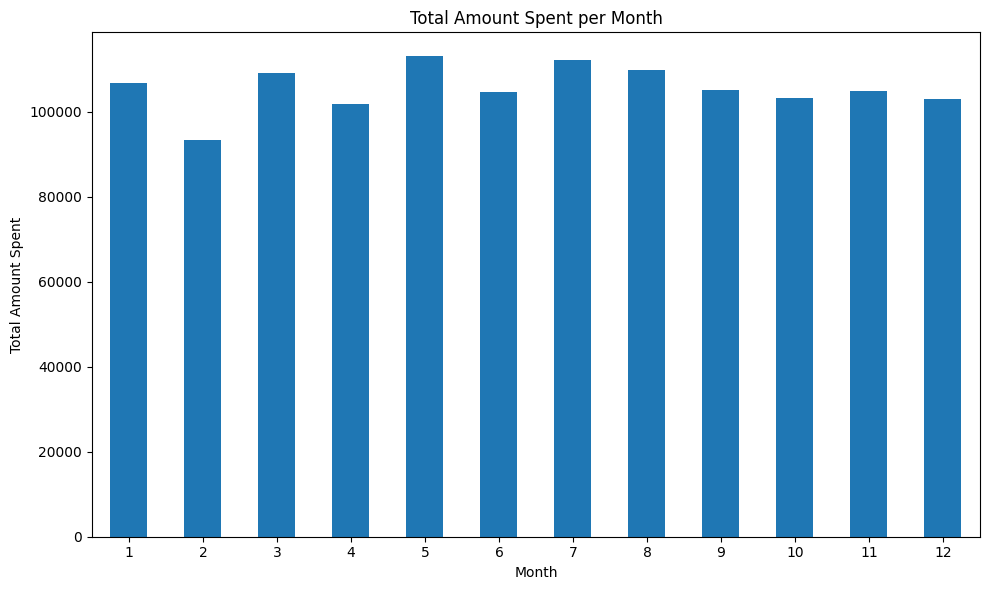

In [77]:
# Group by month and sum AmountSpent
monthly_amount_spent = trans_hist.groupby('Month')['AmountSpent'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
monthly_amount_spent.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent per Month')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [79]:
# prompt: calculate the number of customers who based on the last 3 months of purhcases made from the trans_hist dataframe made the  the least purchases

# Assuming 'trans_hist' DataFrame and 'TransactionDate' column exist as in your previous code.
# Convert 'TransactionDate' to datetime if it's not already
trans_hist['TransactionDate'] = pd.to_datetime(trans_hist['TransactionDate'])

# Calculate the last 3 months
from datetime import datetime, timedelta
last_date = trans_hist['TransactionDate'].max()
three_months_ago = last_date - timedelta(days=90)

# Filter transactions for the last 3 months
last_three_months_data = trans_hist[trans_hist['TransactionDate'] >= three_months_ago]

# Count customer purchases in the last 3 months
customer_purchase_counts = last_three_months_data.groupby('CustomerID')['TransactionID'].count()

# Find the minimum number of purchases
min_purchases = customer_purchase_counts.min()

# Find customers with the least purchases (minimum number of purchases)
least_purchase_customers = customer_purchase_counts[customer_purchase_counts == min_purchases]

# Calculate the number of such customers
num_least_purchase_customers = len(least_purchase_customers)

print(f"Number of customers with the least purchases in the last 3 months: {num_least_purchase_customers}")

Number of customers with the least purchases in the last 3 months: 346


In [82]:
# prompt: calculate the number of customers who based on the last 3 months of purhcases made from the trans_hist dataframe made the  the least purchases an display their customerID's in a list - the list output should be displayed horizontally

import pandas as pd

# Assuming trans_hist DataFrame is already loaded and processed as in your previous code

# Convert 'TransactionDate' to datetime if it's not already
trans_hist['TransactionDate'] = pd.to_datetime(trans_hist['TransactionDate'])

# Filter transactions for the last 3 months
last_3_months = trans_hist['TransactionDate'].max() - pd.DateOffset(months=3)
recent_transactions = trans_hist[trans_hist['TransactionDate'] >= last_3_months]

# Calculate the number of purchases per customer in the last 3 months
customer_purchases = recent_transactions.groupby('CustomerID')['TransactionID'].count()

# Find the minimum number of purchases
min_purchases = customer_purchases.min()

# Identify customers with the minimum number of purchases
least_active_customers = customer_purchases[customer_purchases == min_purchases].index.tolist()


# Display the customer IDs horizontally
print(*least_active_customers)

2 3 7 9 10 12 17 23 25 27 31 32 33 36 39 42 43 44 45 48 50 56 57 60 61 62 64 67 72 75 77 83 89 91 94 95 106 108 111 116 117 118 122 123 126 129 130 131 132 134 136 138 141 142 144 148 151 153 158 163 164 165 172 173 175 178 183 187 197 199 205 210 216 217 222 227 232 233 234 238 240 245 246 247 253 256 259 260 263 267 270 271 276 277 280 283 286 290 291 294 299 302 307 309 310 313 314 315 320 323 324 327 328 331 332 334 335 336 337 338 341 346 352 357 358 359 360 362 371 376 380 383 387 390 392 394 395 396 398 399 405 408 410 416 417 420 423 424 425 426 430 431 433 437 438 440 447 449 452 454 455 456 457 463 466 467 470 476 478 479 482 483 484 485 486 487 489 497 507 514 517 520 522 532 537 542 543 545 547 548 549 554 555 559 560 561 564 568 569 571 577 578 582 585 594 597 600 602 603 611 613 614 617 622 636 637 638 639 650 652 654 656 670 676 682 687 690 691 694 698 708 710 713 714 716 717 718 723 728 729 731 733 734 735 737 739 743 744 746 747 748 753 754 757 763 767 773 776 777 778 

2 3 7 9 10 12 17 23 25 27 31 32 33 36 39 42 43 44 45 48 50 56 57 60 61 62 64 67 72 75 77 83 89 91 94 95 106 108 111 116 117 118 122 123 126 129 130 131 132 134 136 138 141 142 144 148 151 153 158 163 164 165 172 173 175 178 183 187 197 199 205 210 216 217 222 227 232 233 234 238 240 245 246 247 253 256 259 260 263 267 270 271 276 277 280 283 286 290 291 294 299 302 307 309 310 313 314 315 320 323 324 327 328 331 332 334 335 336 337 338 341 346 352 357 358 359 360 362 371 376 380 383 387 390 392 394 395 396 398 399 405 408 410 416 417 420 423 424 425 426 430 431 433 437 438 440 447 449 452 454 455 456 457 463 466 467 470 476 478 479 482 483 484 485 486 487 489 497 507 514 517 520 522 532 537 542 543 545 547 548 549 554 555 559 560 561 564 568 569 571 577 578 582 585 594 597 600 602 603 611 613 614 617 622 636 637 638 639 650 652 654 656 670 676 682 687 690 691 694 698 708 710 713 714 716 717 718 723 728 729 731 733 734 735 737 739 743 744 746 747 748 753 754 757 763 767 773 776 777 778 

C:\Users\Naomie  Fillies\AppData\Local\Temp\ipykernel_12144\3819254548.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inquiry_resolution = least_active_cust_serv.groupby(['InteractionType', 'ResolutionStatus']).size().unstack(fill_value=0)


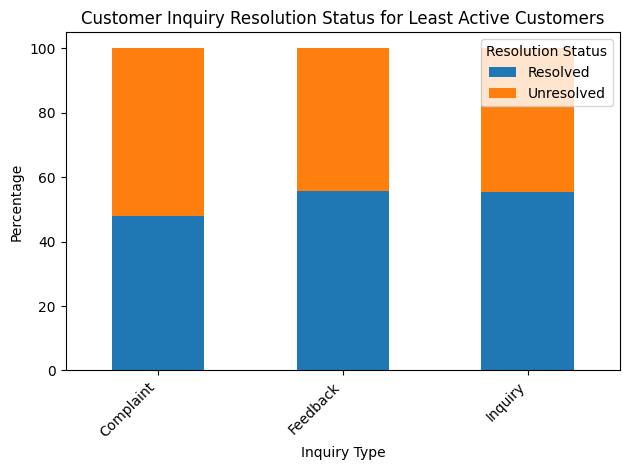

In [86]:
# prompt: calculate the number of customers who based on the last 3 months of purhcases made from the trans_hist dataframe made the  the least purchases an display their customerID's in a list - the list output should be displayed horizontally. Collate the least active customers to the customer inquiry type in the customer service and indicate if its resolution status is resolved or not - visualize the output. Display the percentages for the resolved and unresolved customer inquiries

import pandas as pd

# Assuming trans_hist DataFrame is already loaded and processed as in the previous code

# Calculate the last 3 months of transactions
last_3_months = trans_hist['TransactionDate'].max() - pd.DateOffset(months=3)
recent_transactions = trans_hist[trans_hist['TransactionDate'] >= last_3_months]

# Count purchases for each customer in the last 3 months
customer_purchase_counts = recent_transactions.groupby('CustomerID')['TransactionID'].count()

# Find the minimum number of purchases
min_purchases = customer_purchase_counts.min()

# Get the customer IDs with the least number of purchases
least_active_customers = customer_purchase_counts[customer_purchase_counts == min_purchases].index.tolist()

# Print the customer IDs horizontally
print(*least_active_customers)

# Assuming cust_serv DataFrame is already loaded and merged_df is available

# Merge the least active customers with the customer service data
least_active_cust_serv = cust_serv[cust_serv['CustomerID'].isin(least_active_customers)]

# Group by 'InteractionType' and 'ResolutionStatus', then count occurrences
inquiry_resolution = least_active_cust_serv.groupby(['InteractionType', 'ResolutionStatus']).size().unstack(fill_value=0)

# Calculate percentages
inquiry_resolution_percentages = inquiry_resolution.div(inquiry_resolution.sum(axis=1), axis=0) * 100

# Visualize the data
inquiry_resolution_percentages.plot(kind='bar', stacked=True)
plt.title('Customer Inquiry Resolution Status for Least Active Customers')
plt.xlabel('Inquiry Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Resolution Status')
plt.tight_layout()
plt.show()

In [89]:
# prompt: from the following CustomerID's: 
# 2 3 7 9 10 12 17 23 25 27 31 32 33 36 39 42 43 44 45 48 50 56 57 60 61 62 64 67 72 75 77 83 89 91 94 95 106 108 111 116 117 118 122 123 126 129 130 131 132 134 136 138 141 142 144 148 151 153 158 163 164 165 172 173 175 178 183 187 197 199 205 210 216 217 222 227 232 233 234 238 240 245 246 247 253 256 259 260 263 267 270 271 276 277 280 283 286 290 291 294 299 302 307 309 310 313 314 315 320 323 324 327 328 331 332 334 335 336 337 338 341 346 352 357 358 359 360 362 371 376 380 383 387 390 392 394 395 396 398 399 405 408 410 416 417 420 423 424 425 426 430 431 433 437 438 440 447 449 452 454 455 456 457 463 466 467 470 476 478 479 482 483 484 485 486 487 489 497 507 514 517 520 522 532 537 542 543 545 547 548 549 554 555 559 560 561 564 568 569 571 577 578 582 585 594 597 600 602 603 611 613 614 617 622 636 637 638 639 650 652 654 656 670 676 682 687 690 691 694 698 708 710 713 714 716 717 718 723 728 729 731 733 734 735 737 739 743 744 746 747 748 753 754 757 763 767 773 776 777 778 779 780 782 783 784 788 791 794 797 798 802 803 806 807 808 815 816 820 830 833 837 840 841 843 846 854 856 858 860 861 863 868 869 871 878 879 882 883 886 888 889 891 892 894 895 896 897 902 905 907 909 910 914 918 920 922 923 925 926 927 928 936 940 948 950 951 958 960 962 965 969 973 974 975 979 983 986 987 988 997
# Determine whether they've made inquiries and whether their inquires has a status of resolved or unresolved

import pandas as pd

# Assuming cust_serv DataFrame is already loaded as shown in your provided code.
# If not, load it first.

# Create a list of the CustomerIDs you want to check
customer_ids_to_check = [2, 3, 7, 9, 10, 12, 17, 23, 25, 27, 31, 32, 33, 36, 39, 42, 43, 44, 45, 48, 50, 56, 57, 60, 61, 62, 64, 67, 72, 75, 77, 83, 89, 91, 94, 95, 106, 108, 111, 116, 117, 118, 122, 123, 126, 129, 130, 131, 132, 134, 136, 138, 141, 142, 144, 148, 151, 153, 158, 163, 164, 165, 172, 173, 175, 178, 183, 187, 197, 199, 205, 210, 216, 217, 222, 227, 232, 233, 234, 238, 240, 245, 246, 247, 253, 256, 259, 260, 263, 267, 270, 271, 276, 277, 280, 283, 286, 290, 291, 294, 299, 302, 307, 309, 310, 313, 314, 315, 320, 323, 324, 327, 328, 331, 332, 334, 335, 336, 337, 338, 341, 346, 352, 357, 358, 359, 360, 362, 371, 376, 380, 383, 387, 390, 392, 394, 395, 396, 398, 399, 405, 408, 410, 416, 417, 420, 423, 424, 425, 426, 430, 431, 433, 437, 438, 440, 447, 449, 452, 454, 455, 456, 457, 463, 466, 467, 470, 476, 478, 479, 482, 483, 484, 485, 486, 487, 489, 497, 507, 514, 517, 520, 522, 532, 537, 542, 543, 545, 547, 548, 549, 554, 555, 559, 560, 561, 564, 568, 569, 571, 577, 578, 582, 585, 594, 597, 600, 602, 603, 611, 613, 614, 617, 622, 636, 637, 638, 639, 650, 652, 654, 656, 670, 676, 682, 687, 690, 691, 694, 698, 708, 710, 713, 714, 716, 717, 718, 723, 728, 729, 731, 733, 734, 735, 737, 739, 743, 744, 746, 747, 748, 753, 754, 757, 763, 767, 773, 776, 777, 778, 779, 780, 782, 783, 784, 788, 791, 794, 797, 798, 802, 803, 806, 807, 808, 815, 816, 820, 830, 833, 837, 840, 841, 843, 846, 854, 856, 858, 860, 861, 863, 868, 869, 871, 878, 879, 882, 883, 886, 888, 889, 891, 892, 894, 895, 896, 897, 902, 905, 907, 909, 910, 914, 918, 920, 922, 923, 925, 926, 927, 928, 936, 940, 948, 950, 951, 958, 960, 962, 965, 969, 973, 974, 975, 979, 983, 986, 987, 988, 997]

# Filter the DataFrame for the specified CustomerIDs
filtered_cust_serv = cust_serv[cust_serv['CustomerID'].isin(customer_ids_to_check)]

# Group by 'CustomerID' and get the first 'ResolutionStatus' for each customer
inquiry_statuses = filtered_cust_serv.groupby('CustomerID')['ResolutionStatus'].first()

# Display the results
inquiry_statuses

CustomerID
2        Resolved
3        Resolved
9        Resolved
12       Resolved
17     Unresolved
          ...    
969    Unresolved
979      Resolved
983      Resolved
986      Resolved
988    Unresolved
Name: ResolutionStatus, Length: 227, dtype: category
Categories (2, object): ['Resolved', 'Unresolved']

In [90]:
# prompt: from the following CustomerID's: 
# 2 3 7 9 10 12 17 23 25 27 31 32 33 36 39 42 43 44 45 48 50 56 57 60 61 62 64 67 72 75 77 83 89 91 94 95 106 108 111 116 117 118 122 123 126 129 130 131 132 134 136 138 141 142 144 148 151 153 158 163 164 165 172 173 175 178 183 187 197 199 205 210 216 217 222 227 232 233 234 238 240 245 246 247 253 256 259 260 263 267 270 271 276 277 280 283 286 290 291 294 299 302 307 309 310 313 314 315 320 323 324 327 328 331 332 334 335 336 337 338 341 346 352 357 358 359 360 362 371 376 380 383 387 390 392 394 395 396 398 399 405 408 410 416 417 420 423 424 425 426 430 431 433 437 438 440 447 449 452 454 455 456 457 463 466 467 470 476 478 479 482 483 484 485 486 487 489 497 507 514 517 520 522 532 537 542 543 545 547 548 549 554 555 559 560 561 564 568 569 571 577 578 582 585 594 597 600 602 603 611 613 614 617 622 636 637 638 639 650 652 654 656 670 676 682 687 690 691 694 698 708 710 713 714 716 717 718 723 728 729 731 733 734 735 737 739 743 744 746 747 748 753 754 757 763 767 773 776 777 778 779 780 782 783 784 788 791 794 797 798 802 803 806 807 808 815 816 820 830 833 837 840 841 843 846 854 856 858 860 861 863 868 869 871 878 879 882 883 886 888 889 891 892 894 895 896 897 902 905 907 909 910 914 918 920 922 923 925 926 927 928 936 940 948 950 951 958 960 962 965 969 973 974 975 979 983 986 987 988 997
# Determine whether they've made inquiries and whether their inquires has a status of resolved or unresolved. Indicate the percentage for the clients who's quiries has been resolved versus those which has not been resolved

import pandas as pd

# Assuming cust_serv DataFrame is already loaded as in your provided code
# ... (your existing code to load the data)

# Customer IDs to check
customer_ids = [2, 3, 7, 9, 10, 12, 17, 23, 25, 27, 31, 32, 33, 36, 39, 42, 43, 44, 45, 48, 50, 56, 57, 60, 61, 62, 64, 67, 72, 75, 77, 83, 89, 91, 94, 95, 106, 108, 111, 116, 117, 118, 122, 123, 126, 129, 130, 131, 132, 134, 136, 138, 141, 142, 144, 148, 151, 153, 158, 163, 164, 165, 172, 173, 175, 178, 183, 187, 197, 199, 205, 210, 216, 217, 222, 227, 232, 233, 234, 238, 240, 245, 246, 247, 253, 256, 259, 260, 263, 267, 270, 271, 276, 277, 280, 283, 286, 290, 291, 294, 299, 302, 307, 309, 310, 313, 314, 315, 320, 323, 324, 327, 328, 331, 332, 334, 335, 336, 337, 338, 341, 346, 352, 357, 358, 359, 360, 362, 371, 376, 380, 383, 387, 390, 392, 394, 395, 396, 398, 399, 405, 408, 410, 416, 417, 420, 423, 424, 425, 426, 430, 431, 433, 437, 438, 440, 447, 449, 452, 454, 455, 456, 457, 463, 466, 467, 470, 476, 478, 479, 482, 483, 484, 485, 486, 487, 489, 497, 507, 514, 517, 520, 522, 532, 537, 542, 543, 545, 547, 548, 549, 554, 555, 559, 560, 561, 564, 568, 569, 571, 577, 578, 582, 585, 594, 597, 600, 602, 603, 611, 613, 614, 617, 622, 636, 637, 638, 639, 650, 652, 654, 656, 670, 676, 682, 687, 690, 691, 694, 698, 708, 710, 713, 714, 716, 717, 718, 723, 728, 729, 731, 733, 734, 735, 737, 739, 743, 744, 746, 747, 748, 753, 754, 757, 763, 767, 773, 776, 777, 778, 779, 780, 782, 783, 784, 788, 791, 794, 797, 798, 802, 803, 806, 807, 808, 815, 816, 820, 830, 833, 837, 840, 841, 843, 846, 854, 856, 858, 860, 861, 863, 868, 869, 871, 878, 879, 882, 883, 886, 888, 889, 891, 892, 894, 895, 896, 897, 902, 905, 907, 909, 910, 914, 918, 920, 922, 923, 925, 926, 927, 928, 936, 940, 948, 950, 951, 958, 960, 962, 965, 969, 973, 974, 975, 979, 983, 986, 987, 988, 997]

# Filter the DataFrame for the specified customer IDs
filtered_df = cust_serv[cust_serv['CustomerID'].isin(customer_ids)]

# Calculate the number of resolved and unresolved inquiries
resolved_count = filtered_df[filtered_df['ResolutionStatus'] == 'Resolved'].shape[0]
unresolved_count = filtered_df[filtered_df['ResolutionStatus'] == 'Unresolved'].shape[0]
total_count = resolved_count + unresolved_count

# Calculate the percentages
resolved_percentage = (resolved_count / total_count) * 100 if total_count > 0 else 0
unresolved_percentage = (unresolved_count / total_count) * 100 if total_count > 0 else 0

print(f"Total inquiries for specified customers: {total_count}")
print(f"Resolved inquiries: {resolved_count} ({resolved_percentage:.2f}%)")
print(f"Unresolved inquiries: {unresolved_count} ({unresolved_percentage:.2f}%)")

Total inquiries for specified customers: 340
Resolved inquiries: 181 (53.24%)
Unresolved inquiries: 159 (46.76%)


In [91]:
# prompt: Create a comprehensive report detailing the data gathering, EDA, and data cleaning processes. The report should include:
# A summary of the data sets selected and the rationale for their inclusion
# Visualisations and statistical summaries from the EDA
# A description of the data cleaning and preprocessing steps taken
# The cleaned and preprocessed data set ready for model building
# Ensure that your report is clear, concise, and well-organised, as it will be a key component of the project's success, guiding future analysis and model development.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming df, demog, trans_hist, cust_serv, online_act, and churn_stat are already loaded as in your previous code

# ... (your existing code to load the dataframes)


# Data Cleaning and Preprocessing Steps (example, add more as needed)
# 1. Handle Missing Values:

#Check for missing values in each dataframe
print("Missing values in demog:\n", demog.isnull().sum())
print("\nMissing values in trans_hist:\n", trans_hist.isnull().sum())
print("\nMissing values in cust_serv:\n", cust_serv.isnull().sum())
print("\nMissing values in online_act:\n", online_act.isnull().sum())
print("\nMissing values in churn_stat:\n", churn_stat.isnull().sum())

#Example: Fill missing 'AmountSpent' with the mean
trans_hist['AmountSpent'].fillna(trans_hist['AmountSpent'].mean(), inplace=True)

# 2. Data Type Conversion:  (already done in your code)

# 3. Feature Engineering:
# Example: Create a new feature 'TotalSpent' in trans_hist

trans_hist['TotalSpent'] = trans_hist.groupby('CustomerID')['AmountSpent'].transform('sum')


# 4. Outlier Handling (Example)
#Identify outliers using IQR method
Q1 = trans_hist['AmountSpent'].quantile(0.25)
Q3 = trans_hist['AmountSpent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
trans_hist = trans_hist[(trans_hist['AmountSpent'] >= lower_bound) & (trans_hist['AmountSpent'] <= upper_bound)]

# 5. Merge DataFrames:  (already done in your code)

merged_df = demog.merge(trans_hist, on='CustomerID').merge(online_act, on='CustomerID').merge(cust_serv, on='CustomerID').merge(churn_stat, on='CustomerID')


# Display cleaned and preprocessed dataset
print("\nCleaned and Preprocessed Data:")
print(merged_df.head())

# ... (Rest of your existing code for EDA and visualization, updated with the cleaned data)

Missing values in demog:
 CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

Missing values in trans_hist:
 CustomerID         0
TransactionID      0
TransactionDate    0
AmountSpent        0
ProductCategory    0
Month              0
dtype: int64

Missing values in cust_serv:
 CustomerID          0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64

Missing values in online_act:
 CustomerID        0
LastLoginDate     0
LoginFrequency    0
ServiceUsage      0
dtype: int64

Missing values in churn_stat:
 CustomerID     0
ChurnStatus    0
dtype: int64

Cleaned and Preprocessed Data:
   CustomerID  Age Gender MaritalStatus IncomeLevel  TransactionID  \
0           1   62      M        Single         Low           7194   
1           2   65      M       Married         Low           7250   
2           2   65      M       Married         Low           9660   
3           2   65      M

C:\Users\Naomie  Fillies\AppData\Local\Temp\ipykernel_12144\3477721547.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trans_hist['AmountSpent'].fillna(trans_hist['AmountSpent'].mean(), inplace=True)


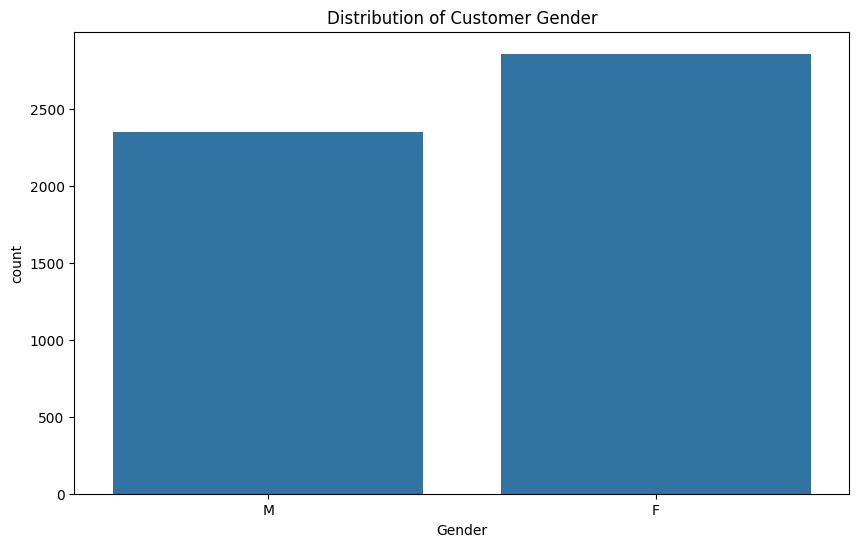

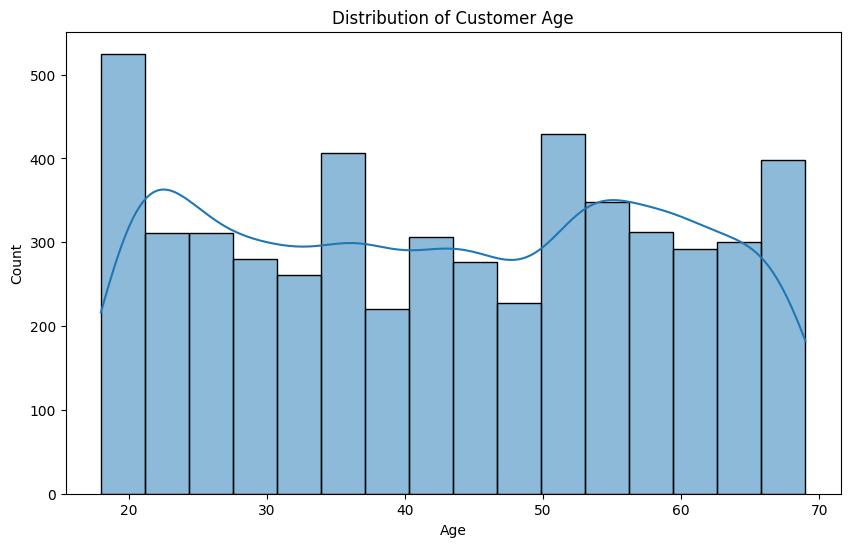

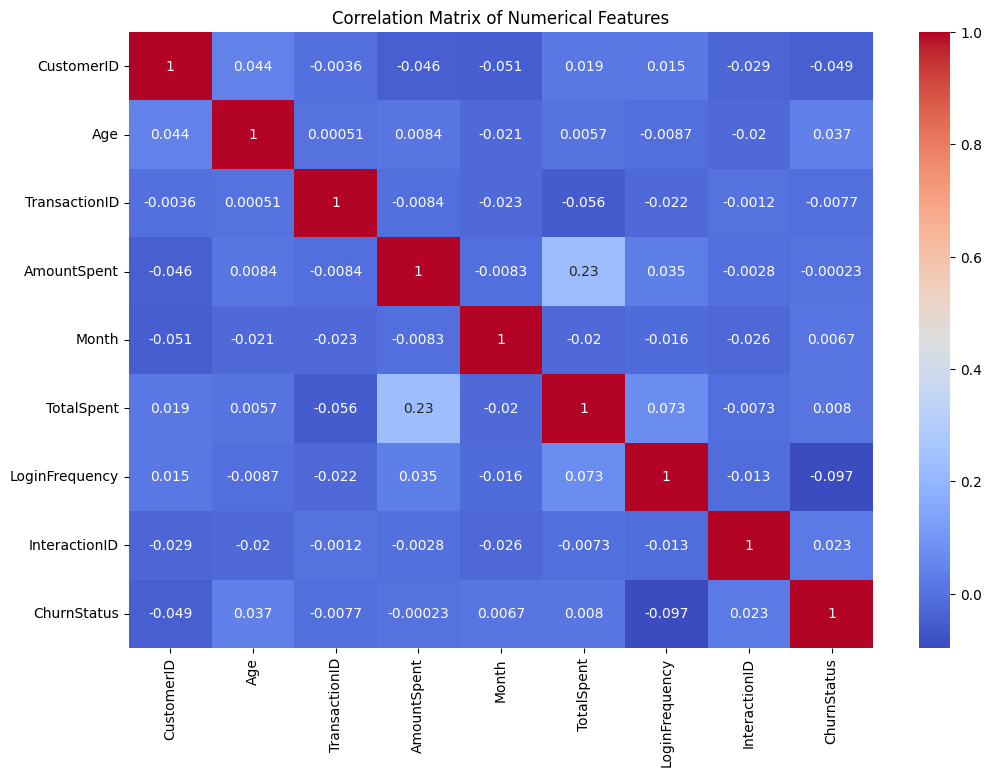

In [92]:
# prompt: from merged_df visualize the customer churn data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is already created as in your previous code

# 1. Customer Demographics Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=merged_df)
plt.title('Distribution of Customer Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=merged_df, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# 2. Relationship between Spending and Churn Status (if Churn_Status is available in merged_df)
if 'Churn_Status' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn_Status', y='AmountSpent', data=merged_df)
    plt.title('Amount Spent vs. Churn Status')
    plt.show()

# 3.  Online Activity and Churn (if relevant columns are available in merged_df)
# Example:  Visualizing the relationship between 'WebVisitsMonth' and churn
if 'WebVisitsMonth' in merged_df.columns and 'Churn_Status' in merged_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn_Status', y='WebVisitsMonth', data=merged_df)
    plt.title('Web Visits per Month vs. Churn Status')
    plt.show()

# 4.  Customer Service Interactions and Churn
# Example (assuming 'InteractionType' and 'Churn_Status' exist):
if 'InteractionType' in merged_df.columns and 'Churn_Status' in merged_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='InteractionType', hue='Churn_Status', data=merged_df)
    plt.title('Interaction Type vs. Churn Status')
    plt.xticks(rotation=45)
    plt.show()


# 5. Correlation Matrix (heatmap for numerical features)
numerical_features = merged_df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [94]:
trans_hist.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory,Month,TotalSpent
0,1,7194,2022-03-27,416.50,Electronics,3,416.50
1,2,7250,2022-08-08,54.96,Clothing,8,1547.42
2,2,9660,2022-07-25,197.50,Electronics,7,1547.42
3,2,2998,2022-01-25,101.31,Furniture,1,1547.42
4,2,1228,2022-07-24,397.37,Clothing,7,1547.42


In [98]:
trans_hist.groupby("ProductCategory").nunique()

,CustomerID,TransactionID,TransactionDate,AmountSpent,Month,TotalSpent
ProductCategory,,,,,,
Books,633,997,340,1027,12,632
Clothing,623,944,338,992,12,622
Electronics,606,945,343,987,12,605
Furniture,615,933,335,985,12,615
Groceries,620,969,351,1010,12,619


In [99]:
cust_serv.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [109]:
cust_serv['month']= cust_serv["InteractionDate"].dt.month

In [112]:
complain = cust_serv.groupby("month")["ResolutionStatus"].nunique().reset_index()

In [118]:
unr = cust_serv['ResolutionStatus']!="Resolved"
r = cust_serv['ResolutionStatus']!="Unresolved"

In [122]:
df = pd.DataFrame(['unr','r'])

In [125]:
unr.value_counts()

ResolutionStatus
False    523
True     479
Name: count, dtype: int64

<Axes: xlabel='ResolutionStatus'>

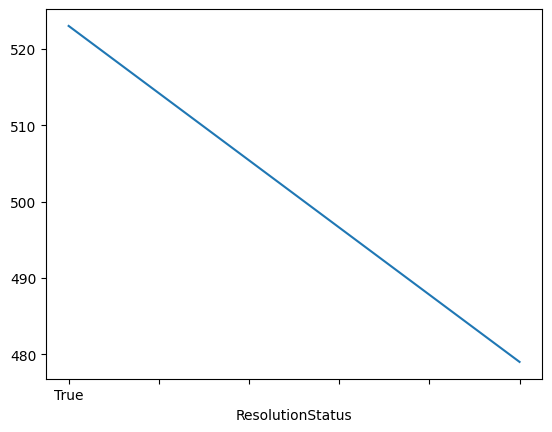

In [127]:
r.value_counts().plot()